In [3]:
import numpy as np
from numpy.typing import NDArray
from matplotlib.pyplot import subplots, show, close

In [2]:
class Spectrum:
    def __init__(self, spectrum: NDArray) -> None:
        self.spec1d: NDArray = spectrum

In [7]:
data = np.loadtxt("calibration.txt")
spec = Spectrum(data)

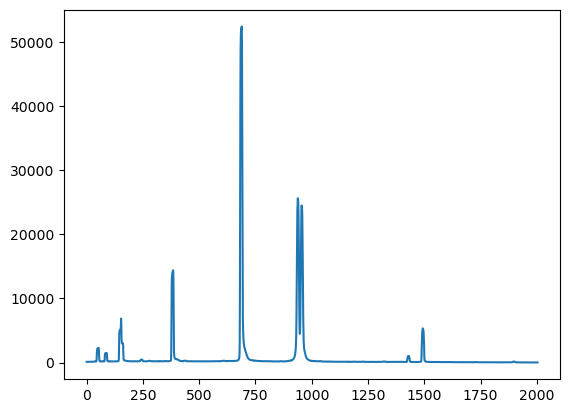

In [8]:
fig, ax = subplots()
ax.plot(spec.spec1d)
show()
close(fig)

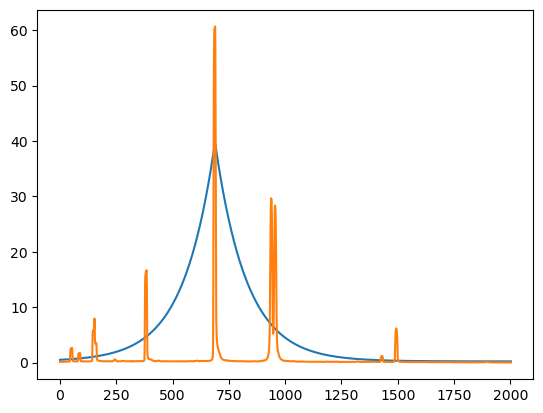

In [31]:
temp = spec.spec1d / spec.spec1d.mean()

xmax = temp.argmax()
Rshape = np.linspace(xmax, temp.size, temp.size-xmax)
Lshape = np.linspace(0, xmax, xmax)
base = np.median(np.abs(temp))
start = 0.65 * temp.max()
Rexc = (start * np.exp(-(Rshape-xmax)/(0.07*temp.size)) + base)
Lexc = (start * np.exp(-(Rshape-xmax)/(0.07*temp.size)) + base)[xmax-1::-1]
exc = np.array(list(Lexc)+list(Rexc))



fig, ax = subplots()

ax.plot(exc)
ax.plot(temp)
show()
close(fig)

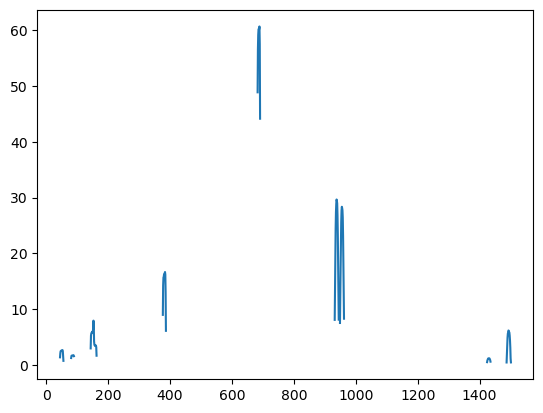

In [32]:
peaks = np.where(temp>exc, temp, np.nan)

fig,ax = subplots()
ax.plot(peaks)
show()
close(fig)